In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [17]:
#import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# In ra kích thước của tập train, test

print("--- KÍCH THƯỚC DỮ LIỆU ---")
print(f"Tập huấn luyện (Train images): {train_images.shape}")
print(f"Nhãn huấn luyện (Train labels): {train_labels.shape}")
print(f"Tập kiểm thử (Test images): {test_images.shape}")
print(f"Nhãn kiểm thử (Test labels): {test_labels.shape}")

# Chuẩn hóa các giá trị pixel của ảnh về đoạn [0,1]

# Chuyển kiểu dữ liệu sang float32 để phép chia chính xác hơn
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

print("\n--- TRẠNG THÁI ---")
print("Đã hoàn tất chuẩn hóa dữ liệu về đoạn [0, 1].")
print(f"Giá trị max sau chuẩn hóa: {train_images.max()}")
print(f"Giá trị min sau chuẩn hóa: {train_images.min()}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
--- KÍCH THƯỚC DỮ LIỆU ---
Tập huấn luyện (Train images): (60000, 28, 28)
Nhãn huấn luyện (Train labels): (60000,)
Tập kiểm thử (Test images): (10000, 28, 28)
Nhãn kiểm thử (Test labels): (10000,)

--- TRẠNG THÁI ---
Đã hoàn tất chuẩn hóa dữ liệu về đoạn [0, 1].
Giá trị max sau chuẩn hóa: 1.0
Giá trị min sau chuẩn hóa: 0.0


In [5]:
'''
d) Định	nghĩa	hàm	create_model,	bao	gồm:
- Model	là	Neural Network	tương	tự	như	câu	2
- Biên	 dịch	 mô	 hình	 sử	 dụng	 optimizer:	 adam;	 loss:
sparse_categorical_crossentropy;	metric:	accuracy
'''
def create_model():
    """
    Hàm này khởi tạo và biên dịch một mô hình Neural Network mới.
    """
    # Khởi tạo mô hình
    model = Sequential()

    # Thêm các lớp (Layers)
    # Input: Ảnh 28x28 -> Flatten thành vector 784
    model.add(Flatten(input_shape=(28, 28)))

    # Hidden Layer: 128 neurons, Relu
    model.add(Dense(128, activation='relu'))

    # Dropout: Chống overfitting (tắt 20%)
    model.add(Dropout(0.2))

    # Output Layer: 10 neurons (0-9), Softmax
    model.add(Dense(10, activation='softmax'))

    # Biên dịch mô hình (Compile)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# --- Kiểm tra thử hàm ---
# Gọi thử hàm để xem nó có tạo ra model không (bước này chỉ để test)
test_model = create_model()
print("Đã định nghĩa xong hàm create_model()!")
test_model.summary()

Đã định nghĩa xong hàm create_model()!


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
'''
e) Huấn	luyện	mô	hình bằng	k-fold	cross	validation	(với	k=10).
Trong	quá	trình	huấn	luyện	lưu	và	in	ra	kết	quả	loss	và	accuracy	của	từng	fold,
lưu	lại	mô	hình	sau	mỗi	fold.
Hướng	dẫn:
- Sử	dụng	KFold	trong	sklearn	để	định	nghĩa	kfold	với	n_spilts	=	10,	shutfle	=	True,
random_state=42
- Với	mỗi	fold:	train_index,	val_index	in	kfold.split(train_images)
o Gán	model	là	kết	quả	của	hàm	create_model()
o Gán	X_train_fold,	X_val_fold,	y_train_fold,	y_val_fold
o Huấn	luyện	mô	hình	dựa	trên	tập	train (X_train_fold,	y_train_fold), đánh
giá	với	tập	validation (X_val_fold,		y_val_fold);	epoch:	5;	batch_size:	32.
o Lưu	model	huấn	luyện	được	vào	mảng	models
o Tính	và in	accuracy	và	loss	của	fold.	Lưu	vào	mảng	accuracy_per_fold[]	và
loss_per_fold[].
'''
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# Khởi tạo các mảng để lưu kết quả
accuracy_per_fold = []
loss_per_fold = []
models = [] # Mảng lưu lại các model đã train xong

fold_no = 1

# Bắt đầu vòng lặp K-Fold
# kfold.split trả về các chỉ số (index) để cắt dữ liệu
for train_index, val_index in kfold.split(train_images):

    # --- Chia dữ liệu cho Fold hiện tại ---
    # Dùng các index để lấy ảnh và nhãn tương ứng
    X_train_fold = train_images[train_index]
    y_train_fold = train_labels[train_index]
    X_val_fold = train_images[val_index]
    y_val_fold = train_labels[val_index]

    # --- Khởi tạo model mới ---
    # Gọi hàm create_model() đã viết ở câu d để lấy một model trắng
    model = create_model()

    print(f'------------------------------------------------------------------------')
    print(f'Đang huấn luyện cho Fold {fold_no} ...')

    # --- Huấn luyện model ---
    history = model.fit(X_train_fold, y_train_fold,
                        batch_size=32,
                        epochs=5,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=1) # verbose=1 để hiện tiến trình

    # --- Đánh giá model trên tập validation của fold này ---
    # model.evaluate trả về [loss, accuracy]
    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Lưu kết quả
    loss_per_fold.append(scores[0])
    accuracy_per_fold.append(scores[1])

    # --- Lưu model vào mảng ---
    models.append(model)

    # In kết quả của fold hiện tại
    print(f'Kết quả Fold {fold_no}: Loss = {scores[0]:.4f} - Accuracy = {scores[1]*100:.2f}%')

    fold_no += 1

print('------------------------------------------------------------------------')
print('Đã hoàn thành huấn luyện 10 folds!')

------------------------------------------------------------------------
Đang huấn luyện cho Fold 1 ...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8560 - loss: 0.5076 - val_accuracy: 0.9537 - val_loss: 0.1606
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9500 - loss: 0.1680 - val_accuracy: 0.9672 - val_loss: 0.1081
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9647 - loss: 0.1191 - val_accuracy: 0.9727 - val_loss: 0.0941
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9701 - loss: 0.0972 - val_accuracy: 0.9753 - val_loss: 0.0796
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9764 - loss: 0.0794 - val_accuracy: 0.9785 - val_loss: 0.0723
Kết quả Fold 1: Loss = 0.0723 - Accuracy = 97.85%
------------------------------------------------------------------------
Đang huấn luyện cho Fold 2 ...
Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8540 - loss: 0.5026 - val_accu

In [8]:
'''
f) Tính	và	in	ra	Mean	Accuracy,	Standard	deviation	accuracy (độ	lệch	chuẩn
của	Accuracy),	Mean	Loss,	Standard	deviation loss	của	mô	hình	trong	quá
trình	huấn	luyện
Hướng	dẫn:	Sử	dụng	mean,	std trong	numpy
'''
mean_acc = np.mean(accuracy_per_fold)
std_acc = np.std(accuracy_per_fold)

# Tính toán các chỉ số cho Loss
mean_loss = np.mean(loss_per_fold)
std_loss = np.std(loss_per_fold)

# In kết quả báo cáo
print("--- KẾT QUẢ ĐÁNH GIÁ K-FOLD (K=10) ---")
print(f"Accuracy trung bình: {mean_acc * 100:.2f}%")
print(f"Độ lệch chuẩn Accuracy: (+/- {std_acc * 100:.2f}%)")
print("-" * 40)
print(f"Loss trung bình: {mean_loss:.4f}")
print(f"Độ lệch chuẩn Loss: (+/- {std_loss:.4f})")

# Nhận xét nhanh
print("\n--- NHẬN XÉT ---")
if std_acc < 0.01: # Nếu lệch dưới 1%
    print("Mô hình rất ổn định (Độ lệch chuẩn thấp).")
else:
    print("Mô hình có sự biến động nhẹ giữa các lần chia dữ liệu.")

--- KẾT QUẢ ĐÁNH GIÁ K-FOLD (K=10) ---
Accuracy trung bình: 97.48%
Độ lệch chuẩn Accuracy: (+/- 0.22%)
----------------------------------------
Loss trung bình: 0.0826
Độ lệch chuẩn Loss: (+/- 0.0063)

--- NHẬN XÉT ---
Mô hình rất ổn định (Độ lệch chuẩn thấp).


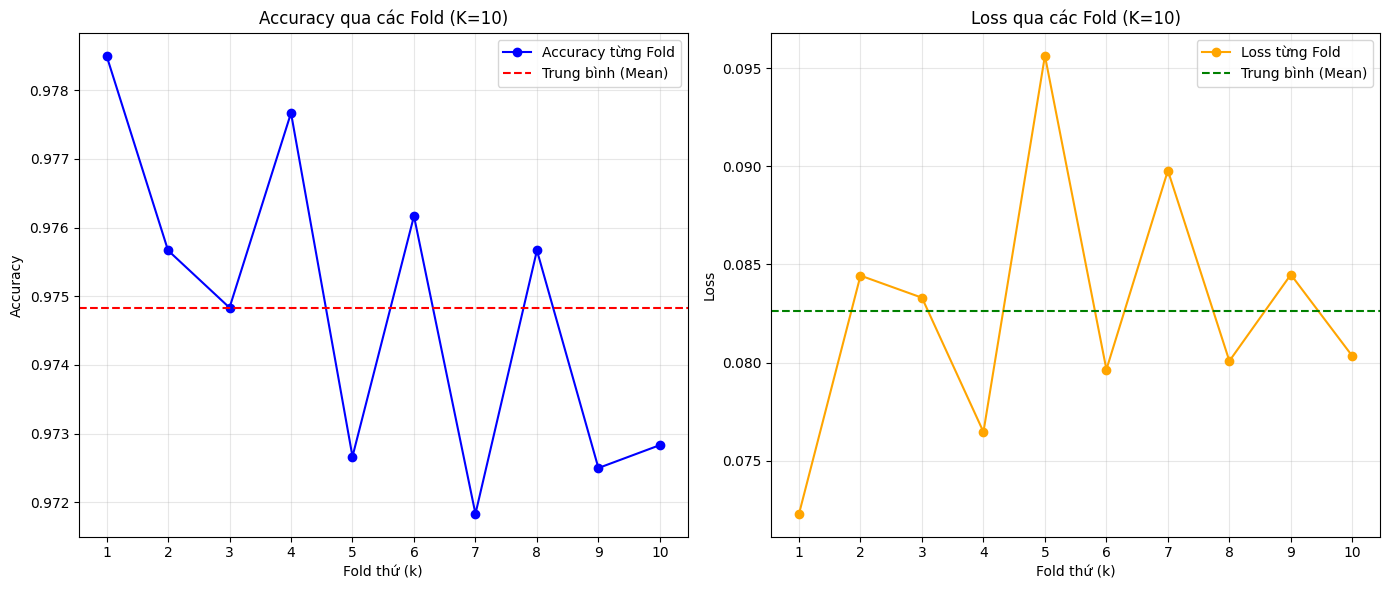

In [10]:
'''
g) Vẽ	biểu	đồ	thể	hiện	accuracy,	loss	sau	mỗi	fold.
Hướng	dẫn:	Sử	dụng	plot	trong	matplotlib
'''
folds = range(1, len(accuracy_per_fold) + 1)

plt.figure(figsize=(14, 6))

# --- Accuracy từng Fold ---
plt.subplot(1, 2, 1) # 1 hàng, 2 cột, vị trí 1
plt.plot(folds, accuracy_per_fold, marker='o', linestyle='-', color='blue', label='Accuracy từng Fold')

# Vẽ thêm đường trung bình (Mean Accuracy) để dễ so sánh
plt.axhline(y=np.mean(accuracy_per_fold), color='red', linestyle='--', label='Trung bình (Mean)')

plt.title('Accuracy qua các Fold (K=10)')
plt.xlabel('Fold thứ (k)')
plt.ylabel('Accuracy')
plt.xticks(folds) # Hiện đủ số 1 đến 10 trên trục hoành
plt.legend()
plt.grid(True, alpha=0.3) # Hiện lưới mờ cho dễ nhìn

# --- Loss từng Fold ---
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, vị trí 2
plt.plot(folds, loss_per_fold, marker='o', linestyle='-', color='orange', label='Loss từng Fold')

# Vẽ thêm đường trung bình (Mean Loss)
plt.axhline(y=np.mean(loss_per_fold), color='green', linestyle='--', label='Trung bình (Mean)')

plt.title('Loss qua các Fold (K=10)')
plt.xlabel('Fold thứ (k)')
plt.ylabel('Loss')
plt.xticks(folds)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
'''
h) Sử	dụng	mô	hình	có	Accuracy	tốt	nhất giữa	các	fold trong	quá	trình	huấn
luyện	và phân	lớp	cho	tập	test.
Hướng	dẫn:
Sử	dụng argmax	của	thư	viện	numpy	để	chọn	ra	index có	accuracy lớn	nhất trong
accuracy_per_fold. Sau	đó	lấy	ra	models[index]
'''
best_fold_index = np.argmax(accuracy_per_fold)

# In thông tin để kiểm tra
print(f"Mô hình tốt nhất thuộc về Fold thứ: {best_fold_index + 1}")
best_acc_val = accuracy_per_fold[best_fold_index]
print(f"Độ chính xác validation của mô hình đó: {best_acc_val * 100:.2f}%")

# Lấy ra mô hình tại index đó từ danh sách models đã lưu
best_model = models[best_fold_index]
print("\nĐã chọn được mô hình tốt nhất!")

# Sử dụng mô hình tốt nhất để phân lớp cho tập Test
print("Đang thực hiện dự đoán trên tập Test (10.000 ảnh)...")

# model.predict trả về xác suất
y_pred_probs_best = best_model.predict(test_images, verbose=1)

# Dùng argmax để chuyển xác suất thành nhãn (con số 0-9) có khả năng cao nhất
y_pred_labels_best = np.argmax(y_pred_probs_best, axis=1)

print("Dự đoán hoàn tất.")
# Kiểm tra kích thước kết quả (phải là (10000,))
print(f"Kích thước mảng kết quả dự đoán: {y_pred_labels_best.shape}")

Mô hình tốt nhất thuộc về Fold thứ: 1
Độ chính xác validation của mô hình đó: 97.85%

Đã chọn được mô hình tốt nhất!
Đang thực hiện dự đoán trên tập Test (10.000 ảnh)...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Dự đoán hoàn tất.
Kích thước mảng kết quả dự đoán: (10000,)


In [13]:
'''
i) Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
'''
test_accuracy = accuracy_score(test_labels, y_pred_labels_best)

# In kết quả
print("--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Tương đương: {test_accuracy * 100:.2f}%")

# So sánh nhẹ với kết quả lúc Validation
print("-" * 40)
print(f"So sánh với độ chính xác Validation của nó: {best_acc_val * 100:.2f}%")
diff = abs(test_accuracy - best_acc_val)
if diff < 0.01:
    print("=> Nhận xét: Kết quả rất sát nhau. Mô hình tổng quát hóa tốt (Không bị Overfitting).")
else:
    print("=> Nhận xét: Có sự chênh lệch đáng kể giữa tập Validation và Test.")

--- KẾT QUẢ CUỐI CÙNG TRÊN TẬP TEST ---
Accuracy: 0.9756
Tương đương: 97.56%
----------------------------------------
So sánh với độ chính xác Validation của nó: 97.85%
=> Nhận xét: Kết quả rất sát nhau. Mô hình tổng quát hóa tốt (Không bị Overfitting).


In [15]:
'''
j) Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của
mô	hình	trên	tập	test
'''
target_names = [f"Chữ số {i}" for i in range(10)]

# Tính toán và in báo cáo
print("--- BÁO CÁO PHÂN LOẠI CHI TIẾT (BEST MODEL) ---")

# digits=4: Hiển thị 4 số sau dấu phẩy để đảm bảo độ chi tiết
report = classification_report(test_labels, y_pred_labels_best,
                               target_names=target_names,
                               digits=4)

print(report)

--- BÁO CÁO PHÂN LOẠI CHI TIẾT (BEST MODEL) ---
              precision    recall  f1-score   support

    Chữ số 0     0.9858    0.9888    0.9873       980
    Chữ số 1     0.9869    0.9921    0.9895      1135
    Chữ số 2     0.9612    0.9845    0.9727      1032
    Chữ số 3     0.9639    0.9772    0.9705      1010
    Chữ số 4     0.9784    0.9705    0.9744       982
    Chữ số 5     0.9710    0.9753    0.9732       892
    Chữ số 6     0.9842    0.9760    0.9801       958
    Chữ số 7     0.9754    0.9650    0.9702      1028
    Chữ số 8     0.9721    0.9671    0.9696       974
    Chữ số 9     0.9767    0.9574    0.9670      1009

    accuracy                         0.9756     10000
   macro avg     0.9756    0.9754    0.9754     10000
weighted avg     0.9757    0.9756    0.9756     10000



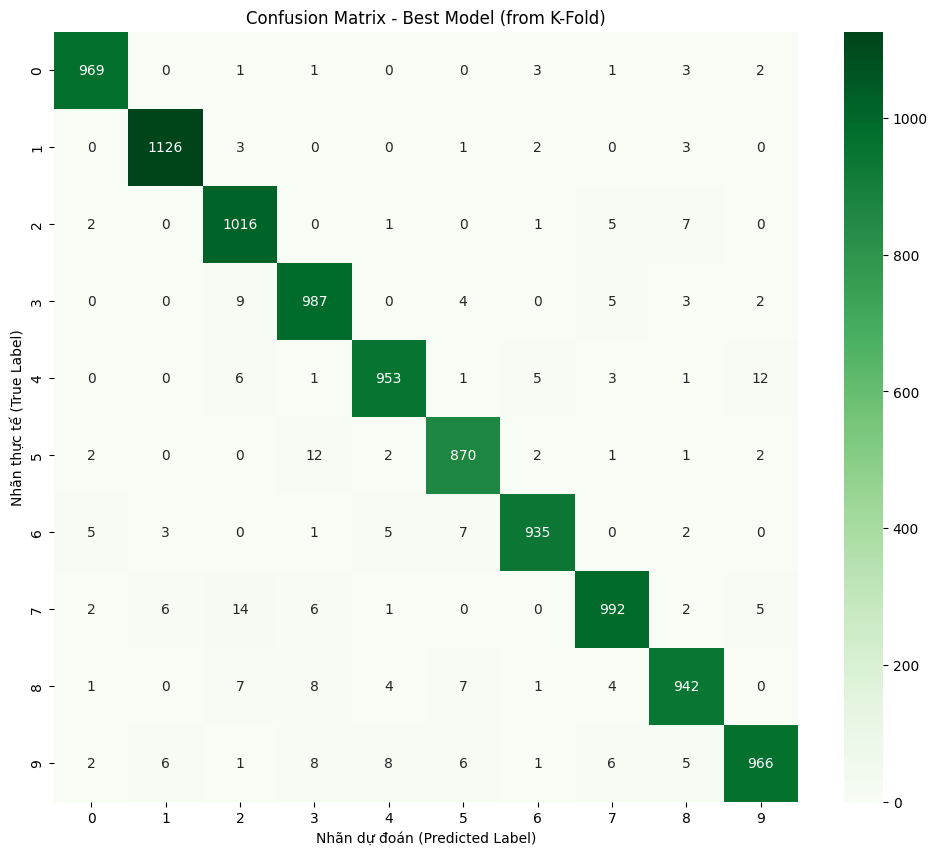

In [18]:
'''
k) Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)
'''
cm_best = confusion_matrix(test_labels, y_pred_labels_best)

# Vẽ Heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens',
            xticklabels=range(10),
            yticklabels=range(10))

plt.xlabel('Nhãn dự đoán (Predicted Label)')
plt.ylabel('Nhãn thực tế (True Label)')
plt.title('Confusion Matrix - Best Model (from K-Fold)')
plt.show()

--- KẾT QUẢ DỰ ĐOÁN 05 ẢNH ĐẦU TIÊN (BEST MODEL) ---


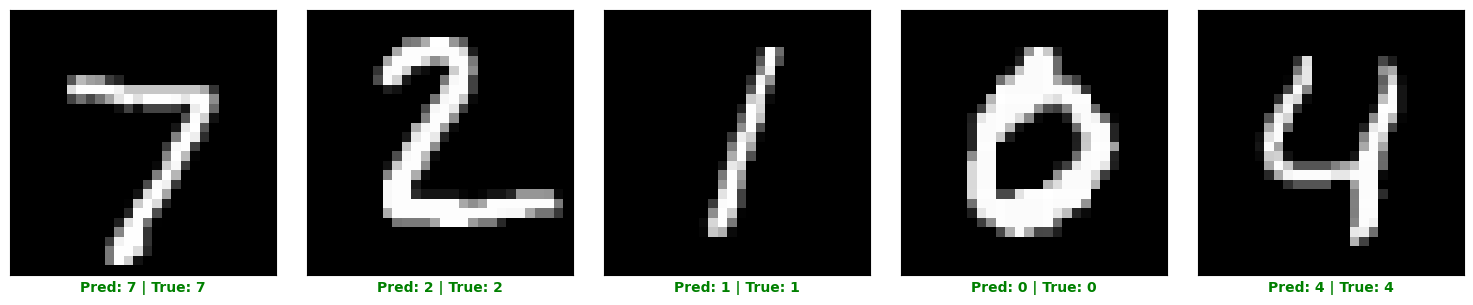

In [19]:
'''
l) In	ra	kết	quả	phân	lớp	của	05	ảnh	đầu	tiên	trong	tập	test
Hướng	dẫn:	Thực	hiện	tương	tự	như	câu	2
'''
plt.figure(figsize=(15, 3))

print("--- KẾT QUẢ DỰ ĐOÁN 05 ẢNH ĐẦU TIÊN (BEST MODEL) ---")

for i in range(5):
    #  Tạo vị trí hiển thị: 1 hàng, 5 cột, vị trí thứ i+1
    plt.subplot(1, 5, i + 1)

    #  Tắt trục tọa độ cho đẹp
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    #  Hiển thị ảnh đen trắng
    plt.imshow(test_images[i], cmap='gray')

    #  Lấy kết quả
    true_label = test_labels[i]
    pred_label = y_pred_labels_best[i] # Lấy từ kết quả dự đoán của Task h

    #  Đặt nhãn dưới ảnh
    # Nếu đúng màu Xanh, sai màu Đỏ
    color = 'green' if pred_label == true_label else 'red'
    plt.xlabel(f"Pred: {pred_label} | True: {true_label}", color=color, fontweight='bold')

plt.tight_layout()
plt.show()